In [43]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
import time
from scipy.integrate import solve_ivp

In [53]:
def ssa(x,c1,c2,c3,T,time_on_init,time_on_end):
    # x=[Y,Z] is the molecule count of each species.
    t_x=[0] # reaction time of fully-observed trajectory
    i=0
    # Reaction matrix.
    v=np.array([[1,0],[-1,1],[0,-1]])
    while t_x[i]<T:
        # Propensity functions
        a = np.array([c1*x[i,0], c2*x[i,0]*x[i,1],c3*x[i,1]])
        sum_a=np.sum(a)
        #print("sum_a= ", sum_a)
        cumsum_a=np.cumsum(a,axis=0)
        # Draw 2 random numbers from U(0,1)
        epsilon=np.random.uniform(0,1,2)
        # Find the reaction that will take place next.
        try:
            j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        except ValueError:  
            pass
        #j=np.min(np.where(epsilon[0]*sum_a<cumsum_a))
        # Compute the time until reaction j happens.
        tau=(np.log(1/epsilon[1]))/sum_a
        # Update molecule counts due to reaction j happening.
        x=np.append(x,[x[i,:]+v[j,:]],axis=0)
        #print("x= ", x)
        # Update time of simulation.
        t_x=np.append(t_x,[t_x[i]+tau])
        #print("t_x= ", t_x)
        i+=1
    return x,t_x

In [54]:
c1=1
c2=0.005
c3=0.6
y1_0=50
y2_0=100
x = np.array([y1_0,y2_0]).reshape(1,2)
T = 100
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = ssa(x,c1,c2,c3,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");

C:\Users\matha\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


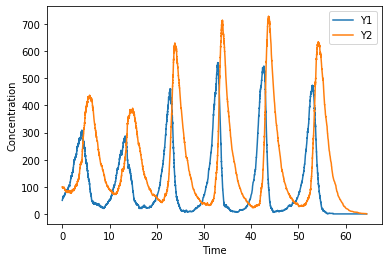

In [55]:
plt.plot(t_x,x[:,0],label='Y1')
plt.plot(t_x,x[:,1],label='Y2')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()

In [59]:
# For c2>c1, the preys extinct. Therefore, the predators extinct too. 
c1=0.005
c2=1
c3=0.6
y1_0=50
y2_0=100
x = np.array([y1_0,y2_0]).reshape(1,2)
T = 20
time_on_init = T//3
time_on_end = 2*T//3

for i in range(1):
    x,t_x = ssa(x,c1,c2,c3,T,time_on_init,time_on_end)
#     plt.plot(x,v[:,[0]]);
# plt.ylabel("Y")
# plt.xlabel("time");

C:\Users\matha\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


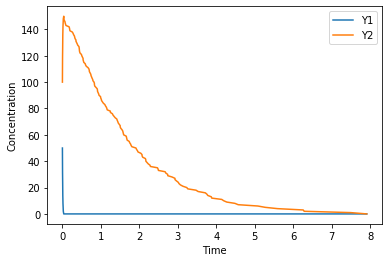

In [60]:
plt.plot(t_x,x[:,0],label='Y1')
plt.plot(t_x,x[:,1],label='Y2')

plt.xlabel('Time')
plt.ylabel('Concentration')

plt.legend()
plt.show()